In [67]:
import cv2
from os import listdir
from os.path import isfile, join
from keras import backend as K
from keras.applications import ResNet50
from keras.models import Model
import numpy as np

from keras.preprocessing import image 




In [68]:
# Build model and load pretrained weights
model = ResNet50()

model.summary() # prints the summary of model with layer names and sizes

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [70]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

# choose from one of the layer names 
layer_name = 'flatten_2'
emb_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Create a model which returns embedding at a particular layer 

In [71]:
from keras.preprocessing import image
def display_image(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def predict_label(img_path):
    x = preprocess_input_image(img_path)
    prediction = model.predict(x)
    print(np.argmax(prediction))
    print('Predicted:', decode_predictions(prediction, top=3)[0])
    


In [72]:
img_path='images/car2.jpeg'
test_image = preprocess_input_image(img_path)
# extract embedding
# embeddings=[]
embedding = emb_model.predict(test_image)
print(embedding)
# embeddings.append(embedding)

[[ 0.0030324   0.31756642  0.         ...,  0.11003964  0.79779387
   0.01895883]]


In [73]:
import matplotlib.pyplot as plt                        
%matplotlib inline 
print(embedding.shape)

(1, 2048)


In [102]:
img_width = 224
img_height = 224
#vgg_path = '/Users/gene/Learn/keras-rtst/vgg16_weights.h5'
images_path = '/Users/anshu/meet-up/internship/embedding/images/'
# tsne_path = '/Users/anshu/meet-up/internship/embedding/tsne_points.txt'

# get images
images = [f for f in listdir(images_path) if isfile(join(images_path, f))]
images_all = [images[i]  for i in range(1,len(images), 1) ] 

images =[]
for im in images_all:
    if(im!='.DS_Store'):
        images.append(im) 
print(images)        

features = np.zeros([len(images), 2048])
i=0
for im in images:
    if(im=='.DS_Store'):
        continue
    test_image = preprocess_input_image(images_path+im)
    
    embedding = emb_model.predict(test_image)
    features[i, :] = emb_model.predict(test_image)
    i=i+1



['parrot25.jpeg', 'dog5.jpg', 'box10.jpeg', 'box3.jpeg', 'face7.jpeg', 'parrot3.jpeg', 'gun4.jpeg', 'fruit7.jpeg', 'parrot13.jpeg', 'face27.jpeg', 'cat1.jpeg', 'fruit6.jpeg', 'parrot12.jpeg', 'face26.jpeg', 'gun5.jpeg', 'parrot2.jpeg', 'face6.jpeg', 'box2.jpeg', 'face10.jpeg', 'parrot24.jpeg', 'box5.jpeg', 'face1.jpeg', 'parrot5.jpeg', 'gun2.jpeg', 'dog1.jpeg', 'parrot15.jpeg', 'fruit1.jpeg', 'face21.jpeg', 'face17.jpeg', 'parrot23.jpeg', 'box9.jpeg', 'parrot9.jpeg', 'car7.jpeg', 'parrot19.jpeg', 'parrot18.jpeg', 'car6.jpeg', 'parrot8.jpeg', 'box8.jpeg', 'face16.jpeg', 'parrot22.jpeg', 'parrot14.jpeg', 'face20.jpeg', 'face101.jpeg', 'dog.jpeg', 'gun3.jpeg', 'parrot4.jpeg', 'box4.jpeg', 'cat4.jpeg', 'parrot17.jpeg', 'fruit3.jpeg', 'face23.jpeg', 'dog3.jpeg', 'parrot7.jpeg', 'face3.jpeg', 'face19.jpeg', 'box7.jpeg', 'car5.jpeg', 'parrot21.jpeg', 'face14.jpeg', 'parrot20.jpeg', 'car4.jpeg', 'box6.jpeg', 'face2.jpeg', 'parrot6.jpeg', 'gun1.jpeg', 'dog2.jpeg', 'parrot16.jpeg', 'fruit2.jpeg'

In [103]:
no_of_images=len(images)
print(no_of_images)
import pickle
with open("features", 'wb') as f:
    pickle.dump((features, images), f)

88


In [104]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
reduced = tsne.fit_transform(features)

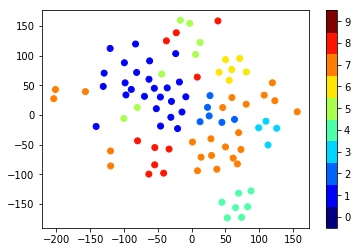

In [117]:
# plt.figure(figsize=(8, 8))
# plt.scatter(x = reduced[:,0], y=reduced[:,1])
# plt.show()
from collections import Counter

target=[None]*len(images)
for idx,im in enumerate(images):
    if('parrot' in im):
        target[idx]=1
    elif 'dog' in im:
        target[idx]=2
    elif 'cat' in im:
        target[idx]=3
    elif 'gun' in im:
        target[idx]=4
    elif 'fruit' in im:
        target[idx]=5
    elif 'car' in im:
        target[idx] =6
    elif 'face' in im:
        target[idx] = 7
    elif 'box' in im:
        target[idx] = 8
    else:
        target[idx] = 9

vis_x = reduced[:, 0]
vis_y = reduced[:, 1]

plt.scatter(vis_x, vis_y, c=target, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [106]:
reduced_transformed = reduced - np.min(reduced, axis=0)
reduced_transformed /= np.max(reduced_transformed, axis=0)
image_xindex_sorted = np.argsort(np.sum(reduced_transformed, axis=1))
print(image_xindex_sorted.shape)

(88,)


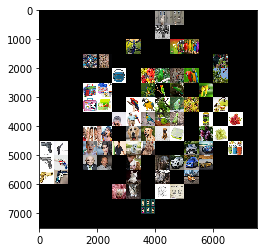

In [118]:
# draw all images in a merged image
no_of_images=200
from PIL import Image
image_width = 500
merged_width = int(np.ceil(np.sqrt(no_of_images))*image_width)
merged_image = np.zeros((merged_width, merged_width, 3), dtype='uint8')
ellipside =True
for counter, index in enumerate(image_xindex_sorted):
    # set location
    if ellipside:
        a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
        b = np.ceil(reduced_transformed[counter, 1] * (merged_width-image_width-1)+1)
        a = int(a - np.mod(a-1,image_width) + 1)
        b = int(b - np.mod(b-1,image_width) + 1)
        if merged_image[a,b,0] != 0:
            continue
        image_address = images[counter]
        img = np.asarray(Image.open('images/'+image_address).resize((image_width, image_width)))
        merged_image[a:a+image_width, b:b+image_width,:] = img[:,:,:3]
    else:
        b = int(np.mod(counter, np.sqrt(no_of_images)))
        a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
        image_address = images[index]
        print(image_address)
        img = np.asarray(Image.open('images/'+image_address).resize((image_width, image_width)))
        merged_image[a*image_width:(a+1)*image_width, b*image_width:(b+1)*image_width,:] = img[:,:,:3]

plt.imshow(merged_image)
plt.show()
merged_image = Image.fromarray(merged_image)
if ellipside:
    merged_image.save('merged-%s-ellipsoide-resnet50.png'%images_path.split('/')[-2])
else:
    merged_image.save('merged-%s.png'%images_path.split('/')[-2])

In [119]:
from tensorflow.contrib.tensorboard.plugins import projector

In [127]:
embeddings_path = '/Users/anshu/meet-up/internship/embedding/'
LOG_DIR = '/Users/anshu/meet-up/internship/embedding/embeddings-logs/'

In [123]:
features.shape


(88, 2048)

In [128]:
np.savetxt('feature_vectors_400_samples.txt',features)
#feature_vectors = np.loadtxt('feature_vectors.txt')
pickle.dump(features, open('feature_vectors_400_samples.pkl', 'wb'))

In [130]:
img_data=[]
print(images)



['parrot25.jpeg', 'dog5.jpg', 'box10.jpeg', 'box3.jpeg', 'face7.jpeg', 'parrot3.jpeg', 'gun4.jpeg', 'fruit7.jpeg', 'parrot13.jpeg', 'face27.jpeg', 'cat1.jpeg', 'fruit6.jpeg', 'parrot12.jpeg', 'face26.jpeg', 'gun5.jpeg', 'parrot2.jpeg', 'face6.jpeg', 'box2.jpeg', 'face10.jpeg', 'parrot24.jpeg', 'box5.jpeg', 'face1.jpeg', 'parrot5.jpeg', 'gun2.jpeg', 'dog1.jpeg', 'parrot15.jpeg', 'fruit1.jpeg', 'face21.jpeg', 'face17.jpeg', 'parrot23.jpeg', 'box9.jpeg', 'parrot9.jpeg', 'car7.jpeg', 'parrot19.jpeg', 'parrot18.jpeg', 'car6.jpeg', 'parrot8.jpeg', 'box8.jpeg', 'face16.jpeg', 'parrot22.jpeg', 'parrot14.jpeg', 'face20.jpeg', 'face101.jpeg', 'dog.jpeg', 'gun3.jpeg', 'parrot4.jpeg', 'box4.jpeg', 'cat4.jpeg', 'parrot17.jpeg', 'fruit3.jpeg', 'face23.jpeg', 'dog3.jpeg', 'parrot7.jpeg', 'face3.jpeg', 'face19.jpeg', 'box7.jpeg', 'car5.jpeg', 'parrot21.jpeg', 'face14.jpeg', 'parrot20.jpeg', 'car4.jpeg', 'box6.jpeg', 'face2.jpeg', 'parrot6.jpeg', 'gun1.jpeg', 'dog2.jpeg', 'parrot16.jpeg', 'fruit2.jpeg'

In [131]:
for img in images:
    input_img=cv2.imread('images/'+img )
    input_img_resize=cv2.resize(input_img,(224,224))
    img_data.append(input_img_resize)
    
                
img_data = np.array(img_data)


In [147]:
import tensorflow as tf
import os
feature_vectors = np.loadtxt('feature_vectors_400_samples.txt')
print ("feature_vectors_shape:",feature_vectors.shape)
print ("num of images:",feature_vectors.shape[0])
print ("size of individual feature vector:",feature_vectors.shape[1])
features = tf.Variable(feature_vectors, name='features')
target
images_name = ['parrot','dog','cat','gun','fruit','car','face','box','others']


metadata_file = open(os.path.join(LOG_DIR, 'metadata_4_classes.tsv'), 'w')
metadata_file.write('Class\tName\n')

for i,label in enumerate(target):
    c = images_name[target[i]-1]
    metadata_file.write('{}\t{}\n'.format(target[i],c))
    
metadata_file.close()

feature_vectors_shape: (88, 2048)
num of images: 88
size of individual feature vector: 2048


In [144]:
def images_to_sprite(data):
    """Creates the sprite image along with any necessary padding

    Args:
      data: NxHxW[x3] tensor containing the images.

    Returns:
      data: Properly shaped HxWx3 image with any necessary padding.
    """
    if len(data.shape) == 3:
        data = np.tile(data[...,np.newaxis], (1,1,1,3))
    data = data.astype(np.float32)
    min = np.min(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) - min).transpose(3,0,1,2)
    max = np.max(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) / max).transpose(3,0,1,2)
    # Inverting the colors seems to look better for MNIST
    #data = 1 - data

    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0),
            (0, 0)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant',
            constant_values=0)
    # Tile the individual thumbnails into an image.
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3)
            + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    data = (data * 255).astype(np.uint8)
    return data
#%%
sprite = images_to_sprite(img_data)
cv2.imwrite(os.path.join(LOG_DIR, 'sprite_4_classes.png'), sprite)

True

In [145]:
with tf.Session() as sess:
    saver = tf.train.Saver([features])

    sess.run(features.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'images_4_classes.ckpt'))
    
    config = projector.ProjectorConfig()
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = features.name
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = os.path.join(LOG_DIR, 'metadata_4_classes.tsv')
    # Comment out if you don't want sprites
    embedding.sprite.image_path = os.path.join(LOG_DIR, 'sprite_4_classes.png')
    embedding.sprite.single_image_dim.extend([img_data.shape[1], img_data.shape[1]])
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)